IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

DJERFAF Ilyes\
TAFOUGHALT Anyes

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [31]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

# Importation de la librairie pickle
import pickle as pkl

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

In [2]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [3]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [4]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

# Import de notre iads :
L'ensemble des fonctions qu'on a développé dans les premiers TME 

In [5]:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

In [6]:
# iads doit être dans le répertoire père du répertoire courant !
import iads as iads

In [7]:
# importation de Classifiers
from iads import Classifiers as classif

In [8]:
# importation de utils
from iads import utils as ut

# Expérimentation KNN
<span style="color:blue">

-   En utilisant le graph d'accuracy en fonction de k, on peut identifier la complexité du modèle. Si la valeur de k est faible, le modèle sera plus complexe et s'ajustera mieux aux données d'entraînement. Cependant, cela peut entraîner un surapprentissage (overfitting) et une moins bonne performance sur les données de test. Si la valeur de k est élevée, le modèle sera plus simple et risque de sous-apprendre (underfitting), ce qui peut également entraîner une moins bonne performance sur les données de test.

-   Le graph d'accuracy de test en fonction de k peut être utilisé pour déterminer la valeur optimale de k. Cette valeur correspond à celle qui donne la meilleure performance sur les données de test (Pic). 

</span>

<span style="color:red">
Il est important de noter que cette valeur optimale peut varier en fonction du jeu de données et des caractéristiques spécifiques de chaque problème.
</span>

## Dataset : data-2D.pkl

### Détermination de la zone de pic de K

In [9]:
def crossval_strat(X, Y, n_iterations, iteration):
    index_pos = [i for i in range(len(Y)) if Y[i] == 1]
    index_neg = [i for i in range(len(Y)) if Y[i] == -1]

    index_pos_test = index_pos[iteration*(len(index_pos) // n_iterations): (
        iteration+1)*(len(index_pos) // n_iterations)]
    index_neg_test = index_neg[iteration*(len(index_neg) // n_iterations): (
        iteration+1)*(len(index_neg) // n_iterations)]

    Xtest = np.concatenate((X[index_neg_test], X[index_pos_test]))
    Ytest = np.concatenate((Y[index_neg_test], Y[index_pos_test]))

    #index_pos_app =  index_pos[:iteration*(len(index_pos) // n_iterations )] + index_pos[(iteration+1)*(len(index_pos) // n_iterations ) :]
    #index_neg_app = index_neg[:iteration*(len(index_neg) // n_iterations)] + index_neg[(iteration+1)*(len(index_neg) // n_iterations ) :]
    index_app = [i for i in range(len(Y)) if (
        (i not in index_pos_test) and (i not in index_neg_test))]

    Xapp = X[index_app]
    Yapp = Y[index_app]
    return Xapp, Yapp, Xtest, Ytest


#### Stratégie : 1- Prendre un K tres grand pour situer la zone de pic

In [10]:
k_values = list(range(1, 100, 16))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

for k in k_values:
    classifierKNN = classif.ClassifierKNN(2, k)
    it_train=0
    it_test=0
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train+=classifierKNN.accuracy(Xapp, Yapp)
        it_test+=classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/iter)
    knn_accuracy_test.append(it_test/iter)

##### Ploter les résultats

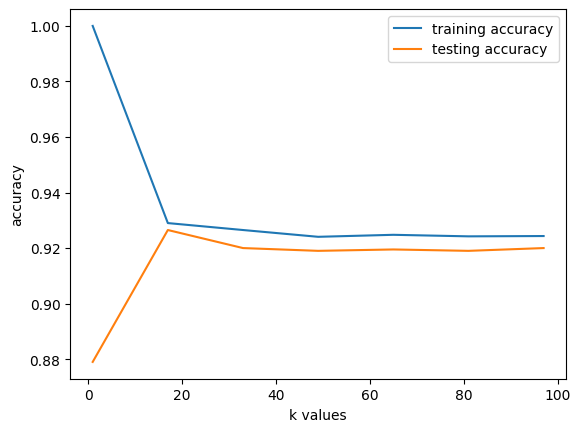

In [11]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

##### Analyse des résultats

<span style="color:blue">

-   En analysant le graph de testing accuracy, on remarque que le pic d'accuracy du test est entre k<20 et k>10

-   Maintenant, on va extraire la valeur exacte du k pour le pic

</span>


#### Stratégie : 2- Extraire la valeur de K, et étude de temps d'execution

In [18]:
k_values = list(range(11, 20, 2))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

# Initialiser une liste vide pour stocker les temps d'exécution pour chaque valeur de k
times = []

for k in k_values:
    classifierKNN = classif.ClassifierKNN(2, k)
    it_train=0
    it_test=0
    # Mesurer le temps d'entraînement et de prédiction
    start_time = time.perf_counter()
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train+=classifierKNN.accuracy(Xapp, Yapp)
        it_test+=classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/10)
    knn_accuracy_test.append(it_test/10)
    end_time = time.perf_counter()

    # Ajouter le temps d'exécution à la liste de temps
    times.append(end_time - start_time)


##### Ploter les résultats

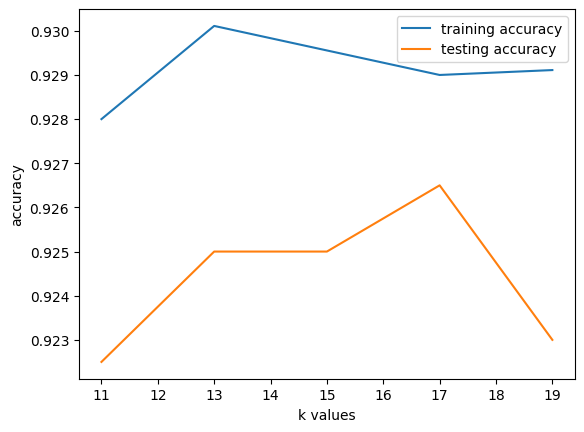

In [13]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

##### Ploter le graphe du temps d'exécution

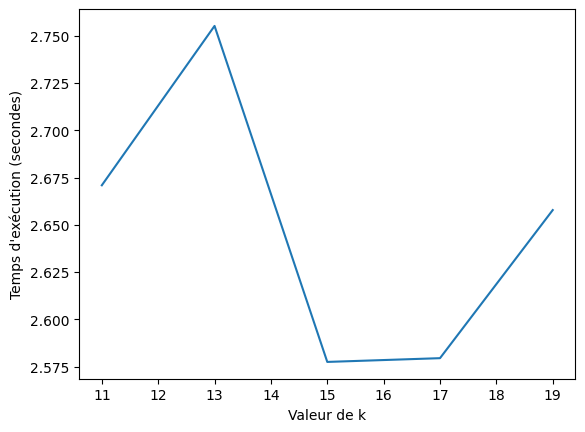

In [21]:
# Tracer un graphique des temps d'exécution par rapport à la valeur de k
import matplotlib.pyplot as plt
plt.plot(k_values, times)
plt.xlabel('Valeur de k')
plt.ylabel('Temps d\'exécution (secondes)')
plt.show()

##### Analyse des résultats
<span style="color:blue">

-   Pour notre premier dataset "Data-2D" la valeur de k optimal est : **17** avec une accuracy de : **0.9265**
-   On note que la différence de temps d'exécution entre k = 15 et k = 17 n'est pas vraiment significative, et que la différence soit simplement due à des variations aléatoires dans le temps d'exécution. Dans ce cas, il est préférable de prendre en compte la valeur de k qui donne la meilleure accuracy de test, même si le temps d'exécution est légèrement plus long. (k = 15 --> 2.5775s, k = 17 --> 2.5794s)

</span>

## Dataset : data-5D.pkl

In [28]:
# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb'))
# conversion de type pour une meilleure compatibilité
X5D = np.array(data5D[['x1', 'x2']], dtype=float)
Y5D = np.array(data5D['label'], dtype=float)


### Détermination de la zone de pic de K

In [33]:
k_values = list(range(1, 100, 16))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

for k in k_values:
    classifierKNN = classif.ClassifierKNN(2, k)
    it_train = 0
    it_test = 0
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train += classifierKNN.accuracy(Xapp, Yapp)
        it_test += classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/iter)
    knn_accuracy_test.append(it_test/iter)



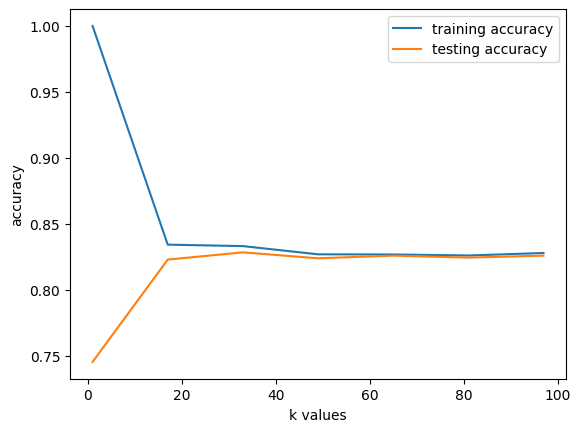

In [34]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()


#### Analyse des résultats
<span style="color:blue">

-   En analysant le graph de testing accuracy, on remarque que le pic d'accuracy du test est entre k<40 et k>30

-   Maintenant, on va extraire la valeur exacte du k pour le pic

</span>

### Extraire la valeur de K, et étude de temps d'execution

In [35]:
k_values = list(range(31, 41, 2))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

# Initialiser une liste vide pour stocker les temps d'exécution pour chaque valeur de k
times = []

for k in k_values:
    classifierKNN = classif.ClassifierKNN(2, k)
    it_train = 0
    it_test = 0
    # Mesurer le temps d'entraînement et de prédiction
    start_time = time.perf_counter()
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train += classifierKNN.accuracy(Xapp, Yapp)
        it_test += classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/10)
    knn_accuracy_test.append(it_test/10)
    end_time = time.perf_counter()

    # Ajouter le temps d'exécution à la liste de temps
    times.append(end_time - start_time)


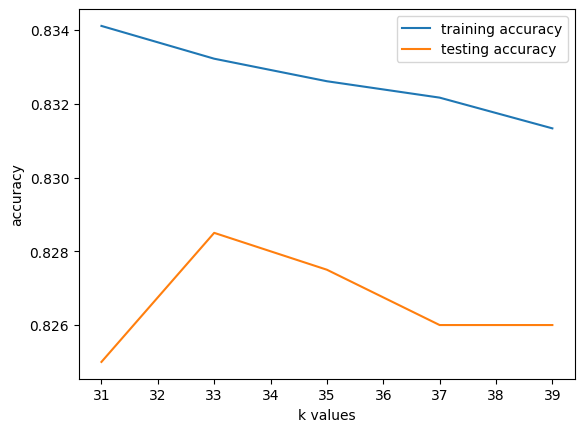

In [36]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()


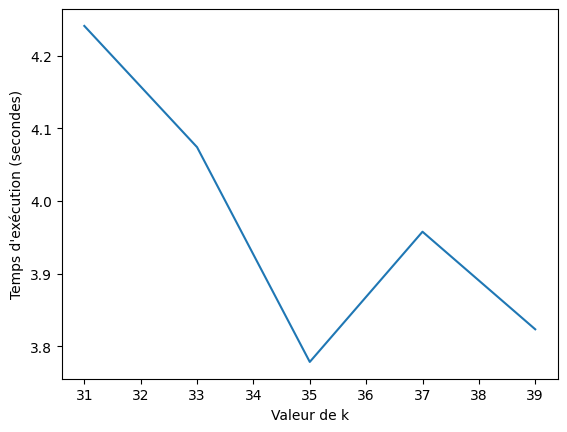

In [40]:
# Tracer un graphique des temps d'exécution par rapport à la valeur de k
plt.plot(k_values, times)
plt.xlabel('Valeur de k')
plt.ylabel('Temps d\'exécution (secondes)')
plt.show()


##### Analyse des résultats
<span style="color:blue">

-   Pour notre 2eme dataset "Data-5D" la valeur de k optimal est : **33** avec une accuracy de : **0.8285**
-   Nous avons eu une valeur optimale pour k en termes de temps d'exécution de 35, plutôt que 33 qui était la valeur optimale pour l'accuracy du modèle. On peut expliquer que cela peut être dû à une complexité plus élevée des données en 5 dimensions, où un k plus grand peut être nécessaire pour capturer la structure de données complexe et obtenir de meilleures performances. Cependant, cela peut également entraîner une augmentation du temps d'exécution, car le modèle doit parcourir plus de points dans l'espace pour trouver les voisins les plus proches.
-    On peut donc conclure que le temps d'exécution moyen est de : **4s**
</span>

## Conclusion sur le Modèle KNN

-   Nous avons testé notre modèle de classification KNN sur deux jeux de données différents : un jeu de données en 2 dimensions et un autre en 5 dimensions. Nous avons utilisé différents valeurs de k et nous avons noté l'accuracy du modèle et le temps d'exécution pour chaque valeur de k.

-   Nous avons observé que pour le jeu de données en 2 dimensions, le k optimal était de 17, avec une précision de 0,9265 et un temps d'exécution de 2,5794 secondes.

-   Pour le jeu de données en 5 dimensions, nous avons trouvé que le k optimal était de 33, avec une précision de 0,8285 et un temps d'exécution de 4,0739 secondes. 

-   On peut expliquer les résultats obtenus pour les deux jeux de données sont différents en raison de la complexité et de la dimensionnalité des données. Le jeu de données en 2 dimensions est moins complexe et moins dimensionnel que celui en 5 dimensions, ce qui signifie qu'il est plus facile pour le modèle de classer correctement les données en utilisant un k plus petit. En revanche, pour le jeu de données en 5 dimensions, un k plus grand est nécessaire pour mieux capturer la structure des données et obtenir de bonnes performances.

-   Enfin, le temps d'exécution est également affecté par la complexité et la dimensionnalité des données, car le modèle doit parcourir plus de points dans l'espace pour trouver les voisins les plus proches.

| Jeu de données | k optimal | Exactitude (Accuracy) | Temps d'exécution |
| --- | --- | --- | --- |
| 2D | 17 | 0,9265 | 2,5794s |
| 5D | 33 | 0,8285 | 4,0739s |

# Expérimentation Perceptron

-   Pour trouver la valeur optimale du taux d'apprentissage pour notre modèle Perceptron, vous pouvez utiliser une approche par **recherche de grille**, ou on va définir une plage de valeurs pour le taux d'apprentissage et entraîner le modèle avec chaque valeur pour trouver celle qui donne les meilleures performances.


<span style="color:red">
---     Il est important de noter que le paramètre du poids (w) n'est pas vraiment un paramètre, mais plutôt une variable interne du modèle qui est initialisée en fonction de la valeur du paramètre init. En effet, le poids est ensuite ajusté par l'algorithme en fonction des données d'entraînement.
</span>

-   Nous allons donc tester les deux cas d'initialisation des poids(init=[True, False]) pour voir laquelle donne les meilleures performances pour chaque dataset.



## Dataset : data-2D.pkl

### Variation de Learning Rate (init = True)

In [48]:
# Liste des valeurs de learning rate à tester
learning_rates = [i/10 for i in range(1, 11)]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0 # Stockage de la précision moyenne sur les données de test
    time_exec = 0 # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptron(input_dimension=2, learning_rate=learning_rate, init=True)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)


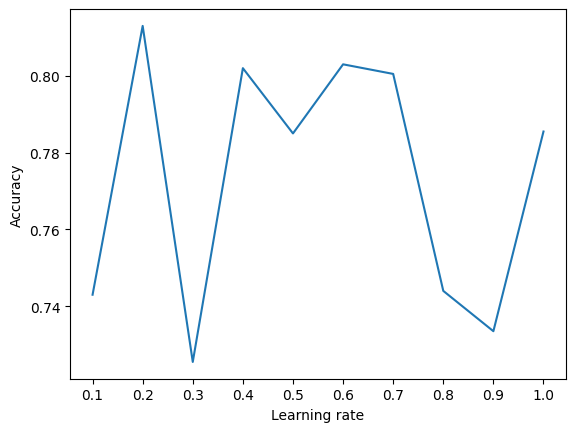

In [52]:

plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()


Apres plusieurs expérimentations pour s'assurer que le paramètre optimal est stable, on peut conclure que la valeur optimal de notre learning_rate est autour de **0.2**

In [77]:
# Liste des valeurs de learning rate à tester
learning_rates = [0.19, 0.20, 0.21, 0.22, 0.23, 0.24]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0  # Stockage de la précision moyenne sur les données de test
    time_exec = 0  # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptron(
            input_dimension=2, learning_rate=learning_rate, init=True)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)


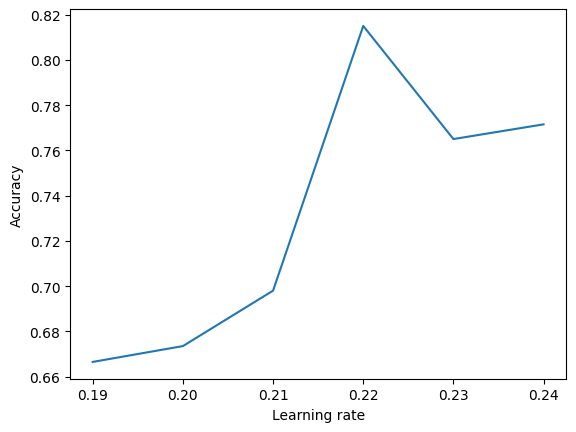

In [78]:
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()


**Remarque**:

-   A chaque exécution, nous avons des différents pic d'accuracy de test mais toujours dans l'intervalle de [0.2 ; 0.25]

### Tracer le temps d'exécution

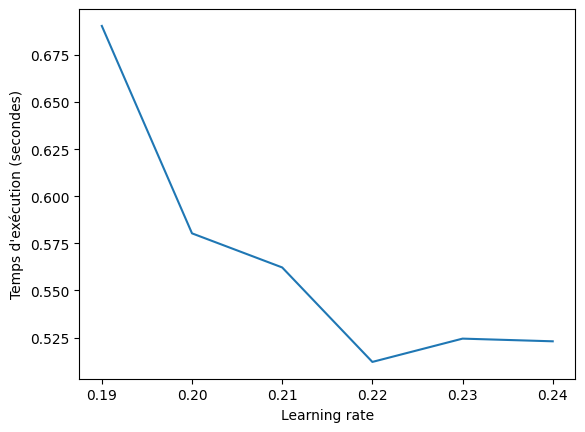

In [74]:
# tracer le temps d'execution par rapport à la valeur de learning rate
plt.plot(learning_rates, times)
plt.xlabel('Learning rate')
plt.ylabel('Temps d\'exécution (secondes)')
plt.show()

En analysant le temps d'exécution pour le modèle perceptron avec différentes valeurs de taux d'apprentissage (learning rate), voici ce que l'on peut conclure :

-   Les temps d'exécution diminuent à mesure que le taux d'apprentissage augmente, ce qui est généralement attendu car un taux d'apprentissage plus élevé permet une convergence plus rapide du modèle.

-   Globalement, les temps d'exécution sont assez proches les uns des autres, ce qui suggère que le choix du taux d'apprentissage n'a pas un impact significatif sur le temps d'exécution du modèle perceptron pour cette dataset de deux dimensions.

-   En résumé, le choix du taux d'apprentissage affecte la convergence et la performance du modèle perceptron, mais n'a pas un impact significatif sur le temps d'exécution pour cette dataset de deux dimensions avec une moyenne de **0.67298s**

### Impact d'initialisation des weights w (init = False)
On va faire les mêmes expérimentations et voir l'impact d'initialisation par tirage aléatoire de valeurs petites de vecteur **w**


In [85]:
# Liste des valeurs de learning rate à tester
learning_rates = [i/10 for i in range(1, 11)]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0  # Stockage de la précision moyenne sur les données de test
    time_exec = 0  # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptron(
            input_dimension=2, learning_rate=learning_rate, init=False)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)


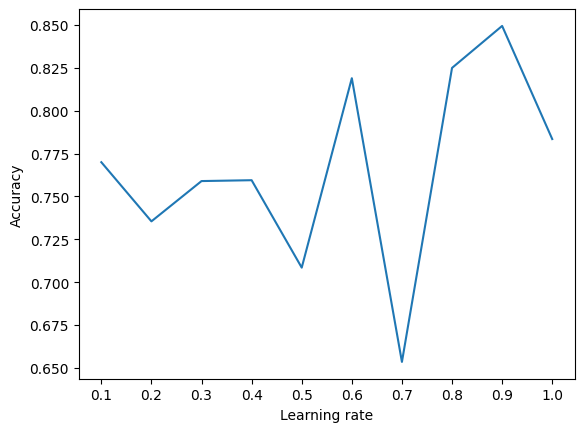

In [86]:
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()


In [95]:
# Liste des valeurs de learning rate à tester
learning_rates = [i for i in range(1, 6)]
accuraciess = []  # Stockage des précisions pour chaque valeur de learning rate
timess = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0  # Stockage de la précision moyenne sur les données de test
    time_exec = 0  # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptron(
            input_dimension=2, learning_rate=learning_rate, init=False)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time

    accuraciess.append(acc_test/nb_iter)
    timess.append(time_exec/nb_iter)


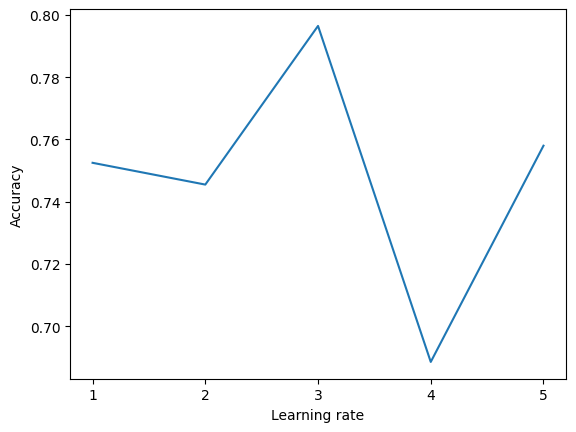

In [96]:
plt.plot(learning_rates, accuraciess)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()


## Dataset : data-5D.pkl